In [1]:
import pandas as pd

training_data = pd.read_csv('../data/cleaned_twitter_training.csv')
validation_data = pd.read_csv('../data/cleaned_twitter_validation.csv')

In [3]:
training_data.head()

,Unnamed: 0.1,Unnamed: 0,tweet_id,entity,sentiment,tweet_content,cleaned_tweet_content
0,0,0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands murder
1,1,1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2,2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands kill
3,3,3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands murder
4,4,4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands murder


In [5]:
X_train = training_data['cleaned_tweet_content'].values.astype('U')
y_train = training_data['sentiment'].values.astype('U')
X_test = validation_data['cleaned_tweet_content'].values.astype('U')
y_test = validation_data['sentiment'].values.astype('U')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test_tfidf)

In [13]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6686819830713422
Precision: 0.6676995239833681
Recall: 0.6686819830713422
F1 Score: 0.6675235698567888

Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.66      0.66       265
     Neutral       0.65      0.60      0.63       285
    Positive       0.69      0.74      0.72       277

    accuracy                           0.67       827
   macro avg       0.67      0.67      0.67       827
weighted avg       0.67      0.67      0.67       827



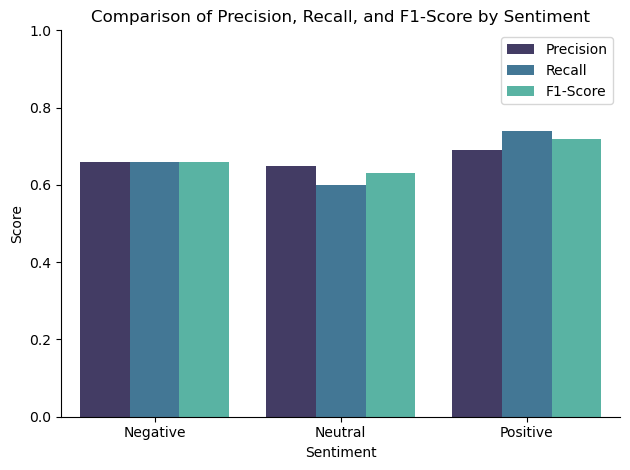

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Category': ['Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive'],
    'Metric': ['Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1-Score', 'F1-Score', 'F1-Score'],
    'Score': [0.66, 0.65, 0.69, 0.66, 0.60, 0.74, 0.66, 0.63, 0.72]
}

df = pd.DataFrame(data)

sns.barplot(x='Category', y='Score', hue='Metric', data=df, palette='mako')

plt.title("Comparison of Precision, Recall, and F1-Score by Sentiment")
plt.ylabel('Score')
plt.xlabel('Sentiment')

plt.ylim(0, 1.0)
plt.legend(bbox_to_anchor=(1, 1))

sns.despine()
plt.tight_layout()
plt.savefig('../visualizations/regression_sentiment_metrics_comparison')
plt.show()

In [95]:
import joblib

joblib.dump(model, '../models/baseline_model.joblib')

['../models/baseline_model.joblib']